<h2><center> Welcome to the Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.

> Cryptojacking can simply be defined as unauthorize use of someone else computer to mine cryptocurrency.

*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [ ]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<a name="Data"></a>
## 2. Loading Data

In [ ]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset

train.head()
#train.tail()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [ ]:
# Preview test dataset
# test.head()
test.tail()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
3813,ID_PAWIH292SB,7.290908,3.276107e+03,27.0,0.034732,0.755765,0.000000,66.596217,60.416728,0.955820,0.866907,0.000000,0.0,332.647660,28.937109
3814,ID_EMPXLFEHRN,12.336515,2.539813e+04,42.0,1.528201,17.115526,1.244766,1401.005811,17492.334080,8.535535,17.737909,0.955802,0.0,15087.869440,28.098248
3815,ID_437MU86JLQ,4.754111,1.123303e+03,30.0,0.000000,1.932746,0.000000,48.518591,28.702390,0.533171,0.377663,0.044431,0.0,370.087546,31.630495
3816,ID_TMGB3DFDLX,271.668446,3.287590e+06,33.0,9.429024,11.242224,1.720977,2277.276675,107508.960100,18.371984,81.623461,0.245854,0.0,8097.574777,27.496611
3817,ID_S2ZV4BHNN5,5.093725,1.108653e+03,25.0,0.000000,0.511597,0.022243,26.046951,15.637068,0.177947,0.066730,0.022243,0.0,335.296100,20.610488


### Definition of Label

> 1 :   if there is evidence of crypto jacking   
 
> 0 :   if there is no evidence of crypto jacking
   

In [ ]:
# Preview sample submission file
samplesubmission.head() 

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,0
3,ID_DNQXNVTXHE,0
4,ID_8CRTF1BJOD,0


In [ ]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

<a name="Statistics"></a>
## 3. Statistical Summaries

In [ ]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_TUR19GE3R5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [ ]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [ ]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()  

(False, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

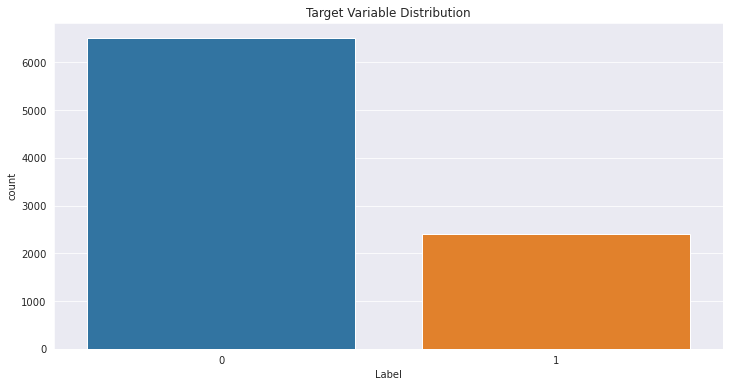

In [ ]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')    
plt.show()

There is a class imbalance in our dataset

#### Class Imbalance 

> Class imbalance can significantly affect the prediction of our model by biasing the model towards the majority class, resulting in lower performance on the minority class. In other words, the model may achieve high accuracy by simply predicting the majority class for every instance, while ignoring the minority class.

To address class imbalance, below are some solutions:

 > 1. Collect more data: Collecting more data can help balance the number of samples in each class, allowing the model to learn more effectively.

 >  2. Resampling techniques: Resampling techniques involve either undersampling the majority class, oversampling the minority class, or a combination of both, to balance the number of samples in each class.

 >  3. Algorithm selection: Some algorithms, such as decision trees and naive Bayes, tend to perform better on imbalanced datasets than others, such as logistic regression and support vector machines. Choosing an appropriate algorithm can help improve performance on the minority class.



### Correlation between variables

> The correlation between variables refers to the extent to which two or more variables are related to each other. 
In statistical terms, correlation is a measure of the strength and direction of the linear relationship between two variables.

> A correlation coefficient is a measure of the strength and direction of the correlation, ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation).

Mathematically, correlation coefficent between 2 variables can be represent as;


> $r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2  \sum_{i=1}^{n}(y_i - \overline{y})^2}}
$

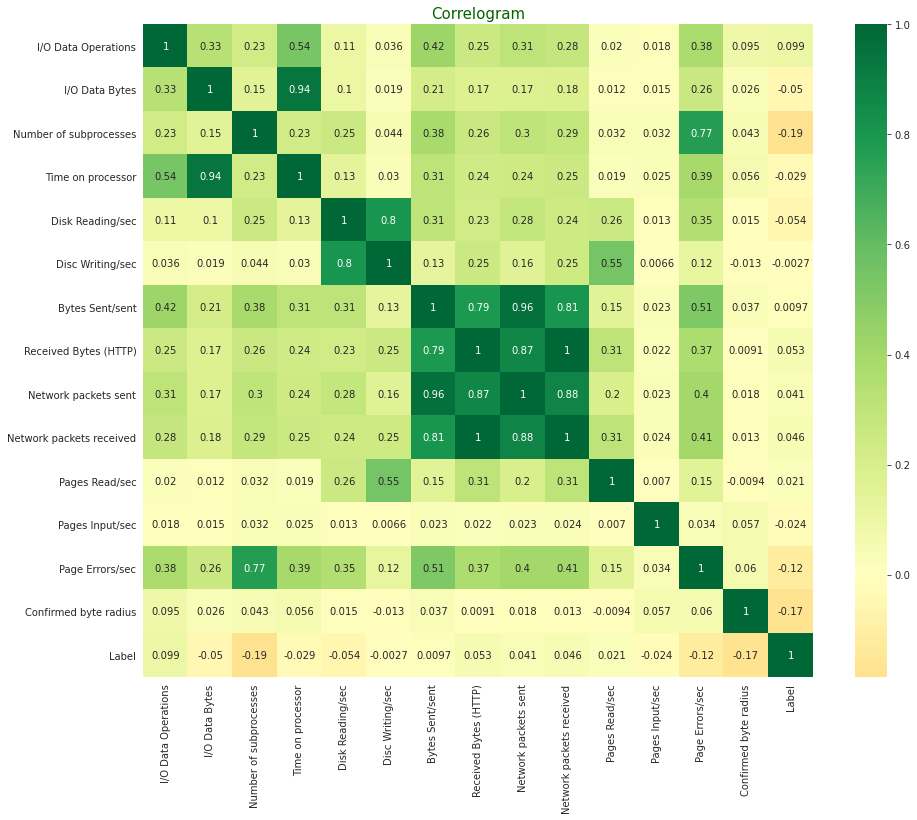

In [ ]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Most features are not strongly correlated with the target

<a name="Preprocess"></a>
## 6. Modeling

In [ ]:
#scale numerical features for logistic model
features = train.drop(columns=['ID','Label']).columns
target = 'Label'

# define standard scaler
scaler = StandardScaler()

# transform data
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [ ]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.3,
                                                    random_state=SEED)

In [ ]:
#fit logistic regression model on rrain data
model = LogisticRegression()
model.fit(X_train, y_train['Label'])

#make predictions on validation set
preds = model.predict(X_test)

### Evaluation

The error metric for this competition is the **F1 score**, which ranges from 0 (total failure) to 1 (perfect score). Hence, the closer your score is to 1, the better your model.  


F1 Score: 

A performance score that combines both precision and recall. It is a harmonic mean of these two variables. Formula is given as: $2*(Precision*Recall)/(Precision + Recall)$

Precision: 

This is an indicator of the number of items correctly identified as positive out of total items identified as positive. Formula is given as: $TP/(TP+FP)$

Recall / Sensitivity / True Positive Rate (TPR): 

This is an indicator of the number of items correctly identified as positive out of total actual positives. Formula is given as: $TP/(TP+FN)$

Where:

TP=True Positive

FP=False Positive

TN=True Negative

FN=False Negative

In [ ]:
#check performance of the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1952
           1       0.74      0.21      0.32       721

    accuracy                           0.77      2673
   macro avg       0.76      0.59      0.59      2673
weighted avg       0.76      0.77      0.71      2673



In [ ]:
#make predictions on test set
test['Target'] = model.predict(test[features])

In [ ]:
sub = test[['ID', 'Target']]

In [ ]:
sub.head() 

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,0
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0


In [ ]:
sub.to_csv('first_submission_crypto.csv', index=False)

## TIPS FOR THE COMPETITION

1. Feature Engineering 
2. Feature Selection
3. Cross Validation
4. Domain Knowledge